In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as nd

In [2]:
im = Image.open("phantom.bmp").convert("L")
print(im)

<PIL.Image.Image image mode=L size=200x200 at 0x1E272BFDC70>


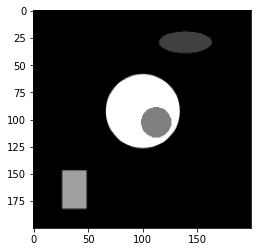

In [3]:
plt.imshow(im, cmap="gray")

In [4]:
projection = []
m = np.array(im)
for x in range(0, im.width):
    projection.append(np.sum(m[x]))

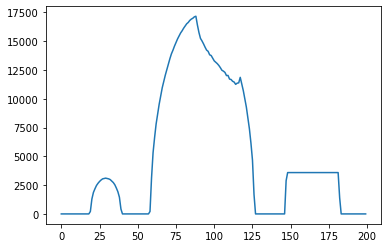

In [5]:
plt.plot(projection)

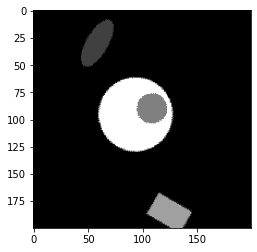

In [6]:
im_r = im.rotate(60)
plt.imshow(im_r, cmap="gray")

In [7]:
projection = []
m = np.array(im_r)
for x in range(0, im_r.width):
    projection.append(np.sum(m[x]))

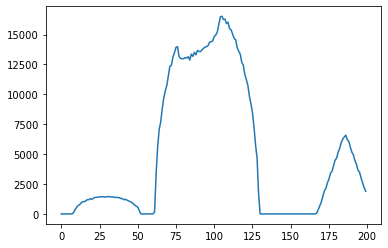

In [8]:
plt.plot(projection)

In [9]:
projections = []
for angle in range(0, 180, 3):
    p = []
    im_r = im.rotate(angle)
    for x in range(0, im.width):
        p.append(np.sum(np.array(im_r)[x]))
    projections.append((angle, p))

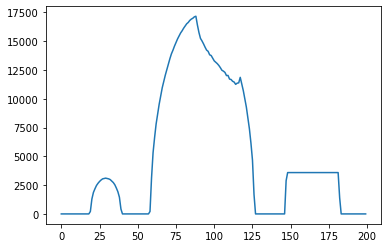

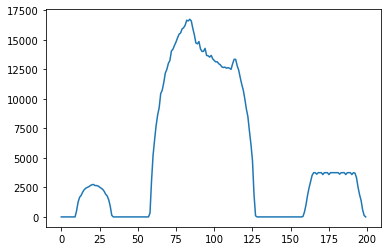

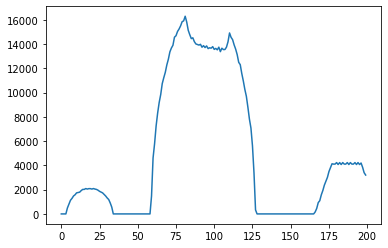

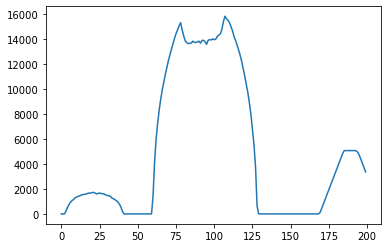

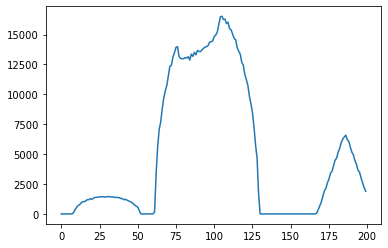

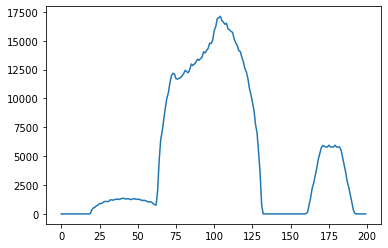

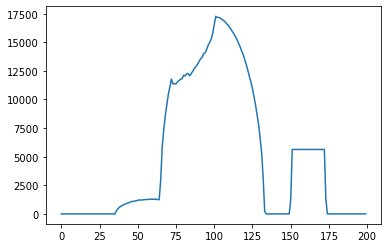

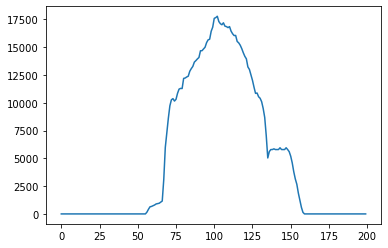

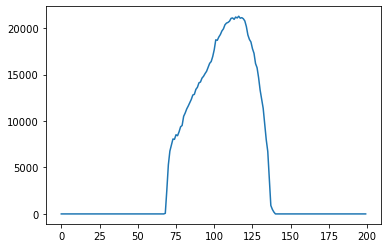

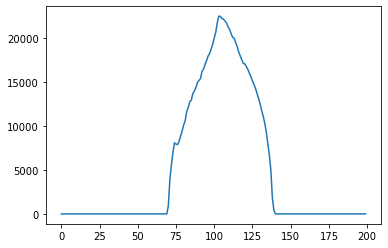

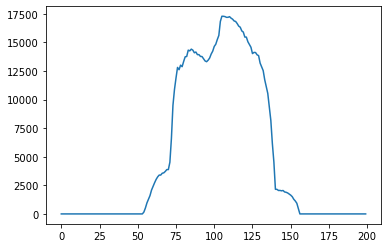

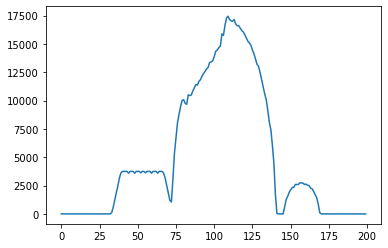

In [10]:
for p in projections:
    if (p[0] % 15) == 0:
        plt.figure()
        plt.plot(p[1])

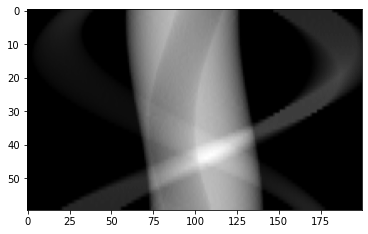

In [11]:
sinogram = np.stack([p[1] for p in projections])
plt.imshow(sinogram, cmap='gray', aspect=2)

In [12]:
bp = np.zeros((im.width, im.height))

for y in range(sinogram.shape[1]):
    bp[:, y] = projections[0][1]

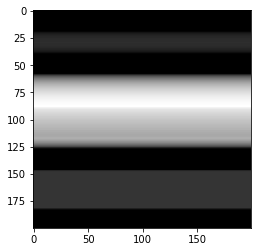

In [13]:
plt.imshow(bp, cmap='gray')

In [14]:
bp = np.zeros((im.width, im.height))

for p in projections:
    
    img = np.zeros(bp.shape)
    
    for y in range(img.shape[1]):
        img[:, y] = p[1]
        
    img = nd.rotate(img, -p[0], reshape=False)
    
    bp += img

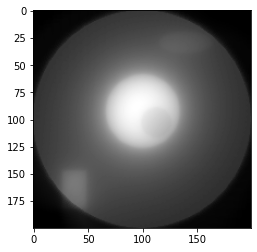

In [15]:
plt.imshow(bp, cmap='gray')

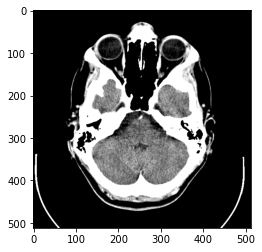

In [16]:
b_im = Image.open('sample_brain.png').convert('L')
plt.imshow(b_im, cmap='gray')

In [17]:
print(b_im)

<PIL.Image.Image image mode=L size=512x512 at 0x1E2762F3370>


In [18]:
b_projections = []

for angle in range(0, 180, 1):
    p = []
    im_r = b_im.rotate(angle)
    for x in range(0, b_im.width):
        p.append(np.sum(np.array(im_r)[x]))
    b_projections.append((angle, p))

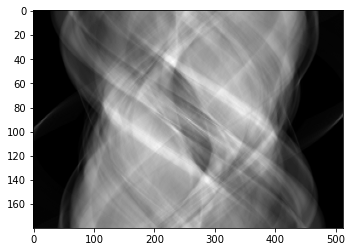

In [19]:
plt.imshow(np.stack([p[1] for p in b_projections]), cmap='gray', aspect=2)

In [20]:
b_bp = np.zeros((b_im.width, b_im.height))

for p in b_projections:
    
    img = np.zeros(b_bp.shape)
    
    for y in range(b_bp.shape[1]):
        
        img[:, y] = p[1]
        
    img = nd.rotate(img, -p[0], reshape=False)
    
    b_bp += img

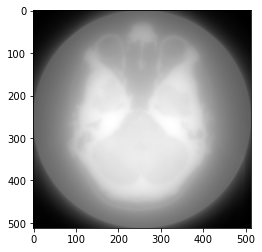

In [21]:
plt.imshow(b_bp, cmap='gray')